# Chapter 7

[Still under construction]

## Review

### The task of statistical inference redeux

We are trying to use data to infer what the probability distribution is that is generating the data. 

Some paradigmatic examples:

- On the basis of a number of flips, are we dealing with a fair coin or a biased coin? More concretely: on the basis of a number of trials, are we dealing with a medical procedure where the chances of success are 50/50 or where they are 70/30?

- On the basis of a number of measurements, are we dealing with a normal distribution which has its center more near 4 or farther away from 4? More concretely: on the basis of a finite number of measurements from patients undergoing a treatment, are we dealing with a measurement which is mostly centered at 4 or mostly centered away from 4? (Nothing special about 4 here: suppose that it is related to some aspect of the health metric under consideration and it is important to determine whether it is 4 or something else).

### The setup 

We are taking measurements in the form of independent random variables $X_1, \ldots, X_n$.

We want to know what their common probability distribution is. This is recorded in the pdf, cdf, of ccdf. For simplicity, let's choose the cdf.

We agree ahead of time that the probability distribution comes from a family $\{F_{\theta}: \theta\in \Theta\}$, where $\Theta$ is the parameter space and as one varies the parameter $\theta$ one gets different options for the probability distribution.

In the actual world $\omega$, we observe data in the form $X_1(\omega), \ldots, X_n(\omega)$. This will be a length $n$ sequence of real numbers.

We develop methods for inferring from this data towards what the value of the parameter $\theta$ is which is generating our data.

Whether we are right or wrong and in what way will be quantified by what happens with this inference method across all the worlds.

## Example 1 inferring whether a coin is fair

We are repeatedly and independently flipping a coin $X_1, \ldots, X_n$.

We want to know the value of $p$ such that $X_1, \ldots, X_n\sim \mathrm{Bern}(p)$.

We formulate two hypotheses:

- The null hypothesis $H_0$: $\hspace{5mm}$ $p=\frac{1}{2}$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $p \neq \frac{1}{2}$. 

We choose a comparatively large value $0\leq c<n$, and we adopt the following test:

- Test: reject $H_0$ if $S_n\geq c$.

where $S_n = \sum_{i=1}^n X_i$ is the sum of the number of heads.

Our initial intutive thinking is: since $c$ is large, if in the actual world we observed $S_n\geq c$ and if the null hypothesis were true then we just observed a very rare event. Rare events are well, rare, and perhaps a more reasonable supposition is that the null hypothesis is false and we are dealing with a coin more biased towards heads.

We can quantify how rare the event $S_n\geq c$ is, assuming the null hypothesis is true: it is just given by plugging $c$ into the pdf + ccdf of $\mathrm{Binom}(n,\frac{1}{2})$ (it is the sum since the pdf handles equality and the ccdf handles strict greater than).

Below is a simple visual representation, where the key fact is that in the graph to the right we see that as we make $c$ bigger, the event becomes rarer and rarer.

In [1]:
# parameters of the binomial distribution

n = 30   # set value of n, number of trials
p = .5 # set value of p, probability of trial for X


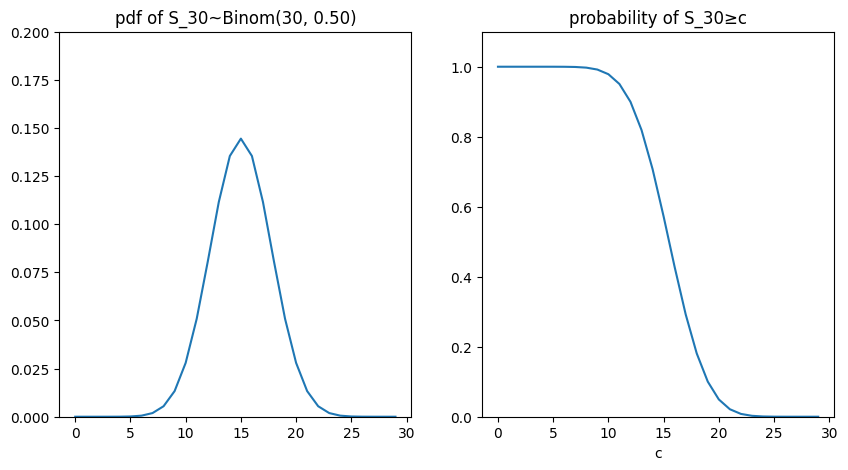

In [2]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution

v = np.arange(0, n) # values for x-axis
Xpdf = binom.pmf(v, n, p) # pdf for X
Xcdf = binom.cdf(v, n, p) # cdf for X
Xccdf = 1-Xcdf               # ccdf for X

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

 # Plot the PDF on the first subplot
axs[0].plot(v, Xpdf)
axs[0].set_ylim(0, .2)
axs[0].set_title('pdf of S_%i~Binom(%i, %1.2f)' % (n,n,p))

# Plot the CCDF on the second subplot
axs[1].plot(v, Xpdf+Xccdf)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('probability of S_%i≥c' % n)
axs[1].set_xlabel('c')  # Add x-axis label

plt.show()

## Example 2 inferring where the normal with known variance is centered

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. 

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,9)$.

That is, we imagine we already know that the variance is 9, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is going to be at 4:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=4$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq 4$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - 4\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

Our initial intuitive thinking is: since $c$ is large, if in the actual world we observed $T_n\geq c$ and if the null hypothesis were true then we just observed a very rare event. Rare events are well, rare, and perhaps a more reasonable supposition is that the null hypothesis is false and we are dealing with a normal distribution which not centered at 4.

We can quantify how rare the event $T_n\geq c$ is, assuming the null hypothesis is true. It is the disjoint union of the events $\overline{X}_n\geq 4+c$ and $\overline{X}_n\leq 4-c$. And it turns out that $\overline{X}_n$ is also normal with $\overline{X}_n\sim N(4,\frac{9}{n})$.

Below is a simple visual representation, where the key thing is that in diagram to right as we make c bigger and bigger the probability gets smaller and smaller

In [3]:
# number of independent observations

n = 15

# parameters of the normal distribution

mu = 4  # mean
var = 3**2 #variance


In [4]:
# variance of the average

varavg = var / n  # variance of the average

# standard deviation of the average

sigma = np.sqrt(var)
sigmaavg = np.sqrt(varavg)


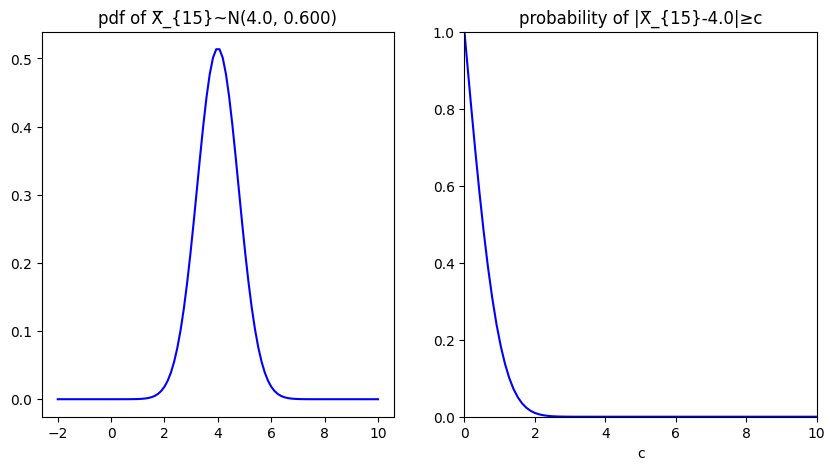

In [5]:
from scipy.stats import norm     # load normal distribution

# Create a range
x = np.linspace(mu-2*sigma, mu+2*sigma, 100)

# Create the normal distribution for the range
y = norm.pdf(x, mu, sigma)
yavg = norm.pdf(x, mu, sigmaavg)
tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the normal distribution on the left subplot
axs[0].plot(x, yavg, 'b')
axs[1].plot(x, tavg, 'b')
axs[1].set_xlim(0, mu+2*sigma)
axs[1].set_ylim(0, 1)    

# Plot the histogram on the right subplot
# axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

# Set titles
axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n, mu, varavg))
axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c' % (n, mu))
axs[1].set_xlabel('c')  # Add x-axis label

plt.show()